<a href="https://colab.research.google.com/github/rmiller34/ATMS-597-SP-2020/blob/master/ATMS_597_Project_2_Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import datetime

In [0]:
import requests

def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.
    
    Parameters:
        - endpoint: The endpoint of the API you want to 
                    make a GET request to.
        - payload: A dictionary of data to pass along 
                   with the request.
    
    Returns:
        Response object.
    """
    return requests.get(
        f'https://www.ncdc.noaa.gov/cdo-web/api/v2/'+endpoint,
        headers={
            'token': 'yicVcIaiwUAgtBveaBtWSaioiQvqRJRh'
        },
        params=payload
    )

In [3]:
# This cell will request locations. We used this to find the locationid for Champaign, IL area.
# !!!No need to run this cell again unless we want to look up a new locationid!!!

response = make_request(
    'locations', 
    {
        'datasetid' : 'GHCND', 
        'locationcategoryid' : 'CITY',
        'datacategoryid' : 'TEMP',
        'sortorder' : 'desc',
        'limit' : 1000 # max allowed
    }
)
response.json()

{'metadata': {'resultset': {'count': 1983, 'limit': 1000, 'offset': 1}},
 'results': [{'datacoverage': 0.9175,
   'id': 'CITY:ZI000004',
   'maxdate': '1990-02-28',
   'mindate': '1968-05-15',
   'name': 'Masvingo, ZI'},
  {'datacoverage': 0.8309,
   'id': 'CITY:ZI000003',
   'maxdate': '2020-02-09',
   'mindate': '1956-07-01',
   'name': 'Harare, ZI'},
  {'datacoverage': 0.9677,
   'id': 'CITY:ZI000002',
   'maxdate': '1989-06-30',
   'mindate': '1951-07-01',
   'name': 'Gweru, ZI'},
  {'datacoverage': 1,
   'id': 'CITY:ZI000001',
   'maxdate': '1990-02-28',
   'mindate': '1962-07-01',
   'name': 'Bulawayo, ZI'},
  {'datacoverage': 0.9746,
   'id': 'CITY:ZA000007',
   'maxdate': '1990-12-30',
   'mindate': '1950-01-01',
   'name': 'Ndola, ZA'},
  {'datacoverage': 1,
   'id': 'CITY:ZA000006',
   'maxdate': '2014-02-12',
   'mindate': '1956-01-01',
   'name': 'Mongu, ZA'},
  {'datacoverage': 0.9762,
   'id': 'CITY:ZA000005',
   'maxdate': '1990-12-30',
   'mindate': '1957-06-01',
   'na

In [0]:
# This cell will request stations. We used this to find the stationid for Rantoul, IL station.
# !!!No need to run this cell again unless we want to look up a new stationid!!!

response = make_request(
    'stations', 
    {
        'datasetid' : 'GHCND',
        'locationid' : 'CITY:US170004', 
        'datacategoryid' : 'TEMP',
        'limit' : 1000 # max allowed
    }
)
response.json()

In [0]:
# Create lists containing the beginning and end of years we want to loop over.

yearstoget = np.arange(1949,2000)
currentlist = []
endlist = []
for i in yearstoget:
    currentlist.append(datetime.date(i, 1, 1))
    endlist.append(datetime.date(i, 12, 31))

In [5]:
# This cell will request the data

resultsmax = [] # get an empty list to fill with data
numloops = np.arange(len(currentlist)) # fill a numpy array with the length of the list of years we want

#Start the loop over the years we want
for i in numloops:
    print(currentlist[i])
    current = currentlist[i] # set current to the beginning of the year in our loop
    end = endlist[i] # set end to the end of the year in our loop
    # update the cell with status information
    #display.clear_output(wait=True)
    #display.display(f'Gathering data for {str(current)}')
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : 'TMAX',
            'stationid' : 'GHCND:USW00014806',
            'startdate' : current,
            'enddate' : end,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )
    response.json()
    resultsmax.extend(response.json()['results']) # put the data in the results list

1949-01-01
1950-01-01
1951-01-01
1952-01-01
1953-01-01
1954-01-01
1955-01-01
1956-01-01
1957-01-01
1958-01-01
1959-01-01
1960-01-01
1961-01-01
1962-01-01
1963-01-01
1964-01-01
1965-01-01
1966-01-01
1967-01-01
1968-01-01
1969-01-01
1970-01-01
1971-01-01
1972-01-01
1973-01-01
1974-01-01
1975-01-01
1976-01-01
1977-01-01
1978-01-01
1979-01-01
1980-01-01
1981-01-01
1982-01-01
1983-01-01
1984-01-01
1985-01-01
1986-01-01
1987-01-01
1988-01-01
1989-01-01
1990-01-01
1991-01-01
1992-01-01
1993-01-01
1994-01-01
1995-01-01
1996-01-01
1997-01-01
1998-01-01
1999-01-01


In [6]:
# This cell will request the data

resultsmin = [] # get an empty list to fill with data
numloops = np.arange(len(currentlist)) # fill a numpy array with the length of the list of years we want

#Start the loop over the years we want
for i in numloops:
    print(currentlist[i])
    current = currentlist[i] # set current to the beginning of the year in our loop
    end = endlist[i] # set end to the end of the year in our loop
    # update the cell with status information
    #display.clear_output(wait=True)
    #display.display(f'Gathering data for {str(current)}')
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : 'TMIN',
            'stationid' : 'GHCND:USW00014806',
            'startdate' : current,
            'enddate' : end,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )
    response.json()
    resultsmin.extend(response.json()['results']) # put the data in the results list

1949-01-01
1950-01-01
1951-01-01
1952-01-01
1953-01-01
1954-01-01
1955-01-01
1956-01-01
1957-01-01
1958-01-01
1959-01-01
1960-01-01
1961-01-01
1962-01-01
1963-01-01
1964-01-01
1965-01-01
1966-01-01
1967-01-01
1968-01-01
1969-01-01
1970-01-01
1971-01-01
1972-01-01
1973-01-01
1974-01-01
1975-01-01
1976-01-01
1977-01-01
1978-01-01
1979-01-01
1980-01-01
1981-01-01
1982-01-01
1983-01-01
1984-01-01
1985-01-01
1986-01-01
1987-01-01
1988-01-01
1989-01-01
1990-01-01
1991-01-01
1992-01-01
1993-01-01
1994-01-01
1995-01-01
1996-01-01
1997-01-01
1998-01-01
1999-01-01


In [0]:
len(resultsmax) # check the length of the results list to make sure we have the correct number of days

3640

In [8]:
# Put the results in a pandas dataframe
dfmax = pd.DataFrame(resultsmax)
dfmax.tail()
dfmin = pd.DataFrame(resultsmin)
dfmin.tail()

,date,datatype,station,attributes,value
18137,1999-12-27T00:00:00,TMIN,GHCND:USW00014806,",,0,0700",-14.4
18138,1999-12-28T00:00:00,TMIN,GHCND:USW00014806,",,0,0700",-17.2
18139,1999-12-29T00:00:00,TMIN,GHCND:USW00014806,",,0,0700",-7.2
18140,1999-12-30T00:00:00,TMIN,GHCND:USW00014806,",,0,0700",-4.4
18141,1999-12-31T00:00:00,TMIN,GHCND:USW00014806,",,0,0700",-7.2


In [0]:
###Rylan's code for getting Yearly Average Temperature goes here. ###

In [0]:
df.to_csv('Rantoul.csv')

In [9]:
#Clean up the TMAX data frame
#dfmax = pd.DataFrame(resultsmax)  # Uncomment to reset the data frame in case you mess up 

dfmax['date']= pd.to_datetime(dfmax['date']) 
dfmax.index = dfmax['date']
 
del dfmax['datatype']
del dfmax['station']
del dfmax['attributes']
#del df['date']
 
dfmax.columns = ['date','TMAX']
dfmax.to_csv('project2_data_TMAX')
 
dfmax.head()

,date,TMAX
date,,
1949-01-01,1949-01-01,-0.6
1949-01-02,1949-01-02,2.8
1949-01-03,1949-01-03,4.4
1949-01-04,1949-01-04,10.0
1949-01-05,1949-01-05,4.4


In [10]:
#Clean up the TMIN data frame
#dfmin = pd.DataFrame(resultsmin)  # Uncomment to reset the data frame in case you mess up

dfmin['date']= pd.to_datetime(dfmin['date']) 
dfmin.index = dfmin['date']
 
del dfmin['datatype']
del dfmin['station']
del dfmin['attributes']
#del df['date']
 
dfmin.columns = ['date','TMIN']
dfmin.to_csv('project2_data_TMIN')
 
dfmin.head()

,date,TMIN
date,,
1949-01-01,1949-01-01,-7.8
1949-01-02,1949-01-02,-3.3
1949-01-03,1949-01-03,1.7
1949-01-04,1949-01-04,4.4
1949-01-05,1949-01-05,-2.8


In [11]:
dfboth = pd.merge(dfmax, dfmin, left_index=True, right_index=True)
del dfboth['date_x']
del dfboth['date_y']
dfboth['TAVG'] = (dfboth['TMAX']+dfboth['TMIN'])/2.0
del dfboth['TMAX']
del dfboth['TMIN']
dfboth

,TAVG
date,
1949-01-01,-4.20
1949-01-02,-0.25
1949-01-03,3.05
1949-01-04,7.20
1949-01-05,0.80
...,...
1999-12-27,-7.50
1999-12-28,-3.30
1999-12-29,-3.05


In [12]:
# Choose the frequency that you want averages for
avgfreq = 'Y'
#avgfreq = 'M'
#avgfreq = 'W'
if avgfreq == 'Y':
    headername = 'Yearly Average Temperature'
    numperyear = 1
if avgfreq == 'M':
    headername = 'Monthly Average Temperature'
    numperyear = 12
if avgfreq == 'W':
    headername = 'Weekly Average Temperature'


df = dfboth.groupby(pd.Grouper(freq=avgfreq)).mean()
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year
df.columns = [headername]
df['Anomalies'] = (df[headername] - df[headername].mean())
df


,Yearly Average Temperature,Anomalies
date,,
1949,11.943014,1.130651
1950,9.939863,-0.872500
1951,9.998356,-0.814007
1952,11.645492,0.833129
1953,12.229945,1.417582
1954,12.244918,1.432555
1955,11.388187,0.575824
1956,11.619399,0.807036
1957,10.825890,0.013528


In [0]:
# A cell for quickly cheking the min and max anomalies for color scale purposes.

mintemp = (min(df['Anomalies'].values))
maxtemp = (max(df['Anomalies'].values))
vmin = int(mintemp) 
vmax = int(maxtemp)

<Figure size 864x360 with 0 Axes>

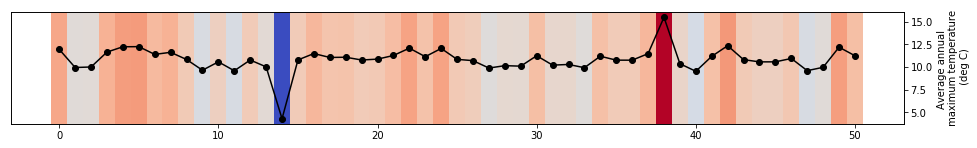

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

#df['Anomalies'].values
ax = plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = vmin , vmax = vmax)
ax.axes.get_yaxis().set_visible(False)
#ax.axes.set_xticklabels(yearstoget[0::10])
ax.axes.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
#ax.axes.set_xlim(left = 0, right = len(yearstoget)-1)

#x_pos = np.arange(len(df['Anomalies']))
#plt.xticks(yearstoget)
ax2 = plt.twinx()
ax2.plot(np.arange(0,(len(yearstoget))*numperyear), df[headername], color = 'black')
ax2.plot(np.arange(0,(len(yearstoget))*numperyear), df[headername], 'ko')
ax2.axes.set_ylabel('Average annual \n maximum temperature \n (deg C)')

plt.show()